<h1> <b> Análisis del Progreso de Vacunación contra el COVID-19 en el Perú </b> </h1>

<b> Actualizado al 5 de abril de 2021 </b>

Datos extraídos de la Plataforma Nacional de Datos Abiertos del Perú, provistos por el Ministerio de Salud (https://www.datosabiertos.gob.pe/dataset/vacunaci%C3%B3n-contra-covid-19-ministerio-de-salud-minsa).

<h2> <b> 1. Importación de Librerías </b> </h2>

In [1]:
#Importamos las librerías principales.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> <b> 2. Importación de Datos </b> </h2>

In [2]:
#Importamos los datos
ruta = "C:/Users/Usuario/Downloads/vacunas_covid.csv"
datos = pd.read_csv(ruta)
datos.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210405,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO
1,20210405,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210318,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO
2,20210405,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210219,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
3,20210405,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210312,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
4,20210405,54048fe3b06c35f14350d7e81340bdbd,PERSONAL DE SALUD,44.0,MASCULINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ


<h2> <b> 3. Pre-Procesamiento de Datos </b> </h2>

<b> Información General del Dataset </b>

In [3]:
#Obtenemos información del dataset.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906671 entries, 0 to 906670
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FECHA_CORTE       906671 non-null  int64  
 1   UUID              906671 non-null  object 
 2   GRUPO_RIESGO      906671 non-null  object 
 3   EDAD              836027 non-null  float64
 4   SEXO              906671 non-null  object 
 5   FECHA_VACUNACION  906671 non-null  int64  
 6   DOSIS             906671 non-null  int64  
 7   FABRICANTE        906671 non-null  object 
 8   DIRESA            906671 non-null  object 
 9   DEPARTAMENTO      906671 non-null  object 
 10  PROVINCIA         906671 non-null  object 
 11  DISTRITO          906671 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 83.0+ MB


<b> Detección de Valores Faltantes </b>

In [4]:
#Calculamos el porcentaje de valores faltantes por columna.
print("Porcentaje de Valores Faltantes por Columna")
np.round((datos.isnull().sum() / len(datos)) * 100, 4)

Porcentaje de Valores Faltantes por Columna


FECHA_CORTE         0.0000
UUID                0.0000
GRUPO_RIESGO        0.0000
EDAD                7.7916
SEXO                0.0000
FECHA_VACUNACION    0.0000
DOSIS               0.0000
FABRICANTE          0.0000
DIRESA              0.0000
DEPARTAMENTO        0.0000
PROVINCIA           0.0000
DISTRITO            0.0000
dtype: float64

<b> Manipulación de Variables </b>

In [5]:
#Creamos las columnas de día, mes y año de vacunación. 
datos["DIA_VACUNACION"] = datos["FECHA_VACUNACION"].apply(lambda x: str(x)[6:])
datos["MES_VACUNACION"] = datos["FECHA_VACUNACION"].apply(lambda x: str(x)[:6][4:])
datos["AÑO_VACUNACION"] = datos["FECHA_VACUNACION"].apply(lambda x: str(x)[:4])

#Concatenamos estas columnas en una columna con el formato de fecha año-mes-día.
datos["FECHA_VACUNACION_DT"] = datos["AÑO_VACUNACION"] + "-" + datos["MES_VACUNACION"] + "-" + datos["DIA_VACUNACION"]

datos.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,DIA_VACUNACION,MES_VACUNACION,AÑO_VACUNACION,FECHA_VACUNACION_DT
0,20210405,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO,25,02,2021,2021-02-25
1,20210405,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210318,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO,18,03,2021,2021-03-18
2,20210405,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210219,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,19,02,2021,2021-02-19
3,20210405,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210312,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,12,03,2021,2021-03-12
4,20210405,54048fe3b06c35f14350d7e81340bdbd,PERSONAL DE SALUD,44.0,MASCULINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,20,02,2021,2021-02-20


<b> Eliminación de Variables </b>

In [6]:
#Eliminamos las columnas que no aporten información útil.
datos.drop(["FECHA_CORTE", "UUID", "DIA_VACUNACION", "MES_VACUNACION", "AÑO_VACUNACION", "FECHA_VACUNACION"], 
           axis = 1, inplace = True)

datos.head()

,GRUPO_RIESGO,EDAD,SEXO,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_VACUNACION_DT
0,PERSONAL DE SALUD,39.0,MASCULINO,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO,2021-02-25
1,PERSONAL DE SALUD,39.0,MASCULINO,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO,2021-03-18
2,PERSONAL DE SALUD,37.0,FEMENINO,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,2021-02-19
3,PERSONAL DE SALUD,37.0,FEMENINO,2,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,2021-03-12
4,PERSONAL DE SALUD,44.0,MASCULINO,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ,2021-02-20


<h2> <b> 4. Análisis de Datos </b> </h2>

<b> Análisis 1: Vacunaciones por Día </b>

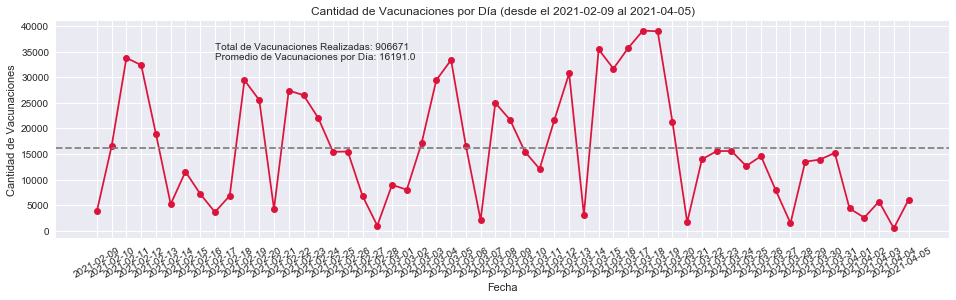

In [7]:
#Establecemos un estilo para los gráficos.
plt.style.use("seaborn")

#Creamos un contador de las vacunaciones por fecha.
vacs = pd.value_counts(datos["FECHA_VACUNACION_DT"]).sort_index(ascending = True)

#Generamos una figura y un eje.
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)

#Creamos un gráfico de línea con los valores del contador, agregando el total de vacunaciones hechas y el promedio diario.
ax.plot(vacs.index, vacs.values, color = "crimson", marker = "o")
ax.set_xlabel("Fecha")
ax.set_ylabel("Cantidad de Vacunaciones")
ax.set_title("Cantidad de Vacunaciones por Día (desde el {} al {})".format(vacs.index[0], 
                                                                           vacs.index[len(vacs) - 1]))
ax.set_xticklabels(vacs.index, rotation = 30)
ax.axhline(y = np.round(np.mean(vacs), 4), linestyle = "--", color = "gray")
ax.annotate("Total de Vacunaciones Realizadas: " + str(np.round(np.sum(vacs), 4)), 
            xy = [vacs.index[8], 35500])
ax.annotate("Promedio de Vacunaciones por Día: " + str(np.round(np.mean(vacs), 0)), 
            xy = [vacs.index[8], 33500])

plt.show()

Con un promedio de más de 15 mil dosis administradas por día desde el 9 de febrero, la cantidad de vacunaciones por día ha tenido un comportamiento irregular a lo largo del proceso de vacunación hasta ahora. Esto puede deberse a variaciones en la disponibilidad de las vacunas, lo que es algo natural. Pueden apreciarse caídas en varios momentos del trayecto, probablemente por falta de suministros.

<b> Análisis 2: Vacunaciones por Día, diferenciadas por Primeras y Segundas Dosis </b>

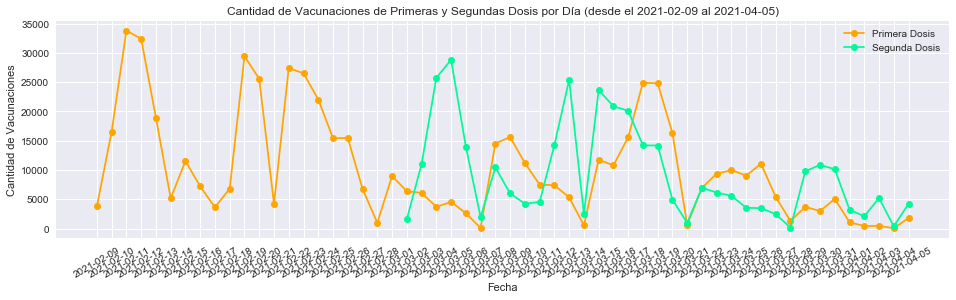

In [8]:
#Creamos dos contadores: Un contador para vacunaciones de primera dosis y uno para vacunaciones de segunda dosis.
dosis_1 = pd.value_counts(datos[datos["DOSIS"] == 1]["FECHA_VACUNACION_DT"]).sort_index(ascending = True)
dosis_2 = pd.value_counts(datos[datos["DOSIS"] == 2]["FECHA_VACUNACION_DT"]).sort_index(ascending = True)

#Generamos una figura y un eje.
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)

#Creamos dos gráficos de línea con los valores de los contadores creados y los diferenciamos con colores y leyendas.
ax.plot(dosis_1.index, dosis_1.values, color = "orange", marker = "o", label = "Primera Dosis")
ax.plot(dosis_2.index, dosis_2.values, color = "mediumspringgreen", marker = "o", label = "Segunda Dosis")
ax.set_xlabel("Fecha")
ax.set_ylabel("Cantidad de Vacunaciones")
ax.set_title("Cantidad de Vacunaciones de Primeras y Segundas Dosis por Día (desde el {} al {})"
             .format(vacs.index[0], vacs.index[len(vacs) - 1]))
ax.set_xticklabels(vacs.index, rotation = 30)
ax.legend()

plt.show()

La administración de primeras dosis ha avanzado de forma continua desde el inicio del proceso de vacunación. Las segundas dosis comenzaron a administrarse desde el 1 de marzo. Puede apreciarse cómo la línea de segundas dosis (línea verde) tiene un patrón similar al que tenía la línea de primeras dosis (linea naranja) al inicio del proceso, lo que sugiere que la mayoría de las personas que recibieron la primera dosis cumplió con el intervalo que suele establecerse entre la primera y segunda dosis, el cual varía dependiendo del fabricante (por ejemplo, en el caso de la vacuna de Pfizer, el intervalo entre las dosis es de 21 días).

<b> Análisis 3: Vacunaciones Aplicadas a los Grupos de Riesgo </b>

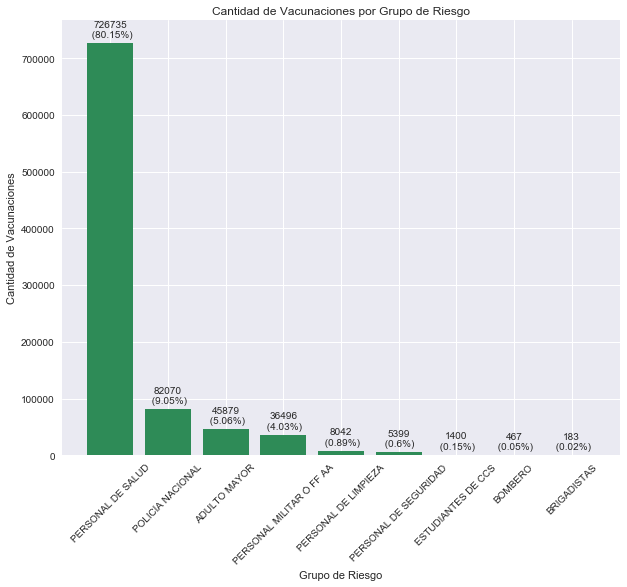

In [9]:
#En la columna GRUPO_RIESGO existe el valor "ESTUDIANTES DE CIENCIAS DE LA COMUNICACIÓN".
#Este valor interfiere con la estética del próximo gráfico.
#Debido a esto, se reemplazarán todas las instancias de este valor con "ESTUDIANTES DE CCS".
datos["GRUPO_RIESGO"] = datos["GRUPO_RIESGO"].apply(lambda x: x.replace("ESTUDIANTES DE CIENCIAS DE LA SALUD", 
                                                                       "ESTUDIANTES DE CCS"))

#Adicionalmente, para la misma columna, cambiamos "TRABAJADOR Ó PERSONAL DE LIMPIEZA" por "PERSONAL DE LIMPIEZA"
#y "POLICÍA NACIONAL DEL PERÚ" por "POLICÍA NACIONAL".
datos["GRUPO_RIESGO"] = datos["GRUPO_RIESGO"].apply(lambda x: x.replace("TRABAJADOR Ó PERSONAL DE LIMPIEZA", 
                                                                       "PERSONAL DE LIMPIEZA"))
datos["GRUPO_RIESGO"] = datos["GRUPO_RIESGO"].apply(lambda x: x.replace("POLICIA NACIONAL DEL PERU", 
                                                                       "POLICÍA NACIONAL"))

#Creamos un contador de las vacunaciones para cada grupo de riesgo.
grupos = pd.value_counts(datos["GRUPO_RIESGO"], ascending = False)

#Generamos una figura y un eje.
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

#Creamos un gráfico de barras con los valores del contador.
#Añadimos la cantidad de vacunaciones recibidas por grupo de riesgo y el porcentaje del total correspondiente.
ax.bar(grupos.index, grupos.values, color = "seagreen")
ax.set_xticklabels(grupos.index, rotation = 45)
ax.set_xlabel("Grupo de Riesgo")
ax.set_ylabel("Cantidad de Vacunaciones")
ax.set_title("Cantidad de Vacunaciones por Grupo de Riesgo")
ax.set_ylim([0, max(grupos.values) + 40000])

for grupo in grupos.index:
    ax.annotate(str(grupos[grupo]) + "\n (" + str(np.round(grupos[grupo] / sum(grupos) * 100, 2)) + "%)",
                xy = [grupo, grupos[grupo] + 10000], ha = "center")

plt.show()

Como podría esperarse, el personal de salud es el grupo que más vacunaciones recibió durante esta primera etapa. Esto puede considerase una decisión estratégica, ya que, al inmunizar al personal de salud, se reduce el riesgo de tener indisponibilidad de este personal a causa de contagios, y por lo tanto se tendrán más recursos para ayudar a los afectados. A medida que el proceso avanza, podría verse mayor equidad entre los grupos.

<b> Análisis 4: Distribución de las Vacunaciones Aplicadas a cada Departamento </b>

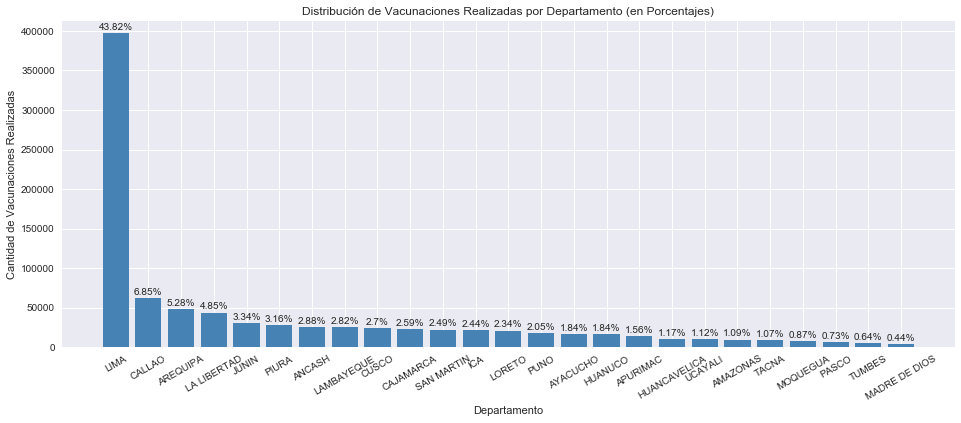

In [10]:
#Creamos un contador con las vacunaciones recibidas en cada departamento.
deps = pd.value_counts(datos["DEPARTAMENTO"])

#Generamos una figura y un eje.
fig, ax = plt.subplots(figsize = (16, 6))

#Creamos un gráfico de barras con los valores del contador.
#Añadimos el porcentaje correspondiente a cada departamento, respecto del total de vacunas recibidas.
ax.bar(deps.index, deps.values, color = "steelblue")
ax.set_xticklabels(deps.index, rotation = 30)
ax.set_xlabel("Departamento")
ax.set_ylabel("Cantidad de Vacunaciones Realizadas")
ax.set_title("Distribución de Vacunaciones Realizadas por Departamento (en Porcentajes)")
ax.set_ylim([0, max(deps.values) + 15000])

for dep in deps.index:
    ax.annotate(str(round(deps[dep] / sum(deps) * 100, 2)) + "%", xy = [dep, deps[dep] + 4000], ha = "center")

plt.show()

Debido a la sustancial diferencia en número de habitantes entre Lima y los demás departamentos (Lima tiene alrededor de 10 millones de habitantes, el resto de departamentos tiene menos de 2 millones y medio), este departamento es el que mayor proporción de vacunas ha recibido en lo que va del proceso.
Las regiones, clasificadas por su nivel de riesgo, pueden verse en https://www.gob.pe/12365-coronavirus-medidas-para-enfrentar-la-pandemia-segun-nivel-de-alerta-y-region.

<b> Análisis 5: Participación de los Fabricantes de las Vacunas </b>

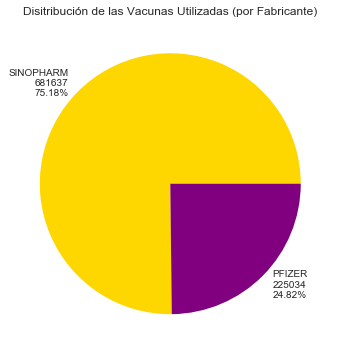

In [11]:
#Creamos un contador de las vacunas aplicadas, distinguidas por fabricante.
fabs = pd.value_counts(datos["FABRICANTE"])

#Generamos una figura y un eje.
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

#Creamos un grupo de etiquetas para el próximo gráfico.
etiquetas = []

for fab in fabs.index:
    texto = fab + "\n" + str(fabs[fab]) + "\n" + str(np.round(fabs[fab] / sum(fabs) * 100, 2)) + "%"
    etiquetas.append(texto)

#Creamos un gráfico circular con los valores del contador.
#Añadimos la cantidad de vacunas aplicadas de cada fabricante, junto con el porcentaje que le corresponda a cada uno.
ax.pie(fabs.values, labels = etiquetas, colors = ["gold", "purple"])
ax.set_xticklabels(fabs.index, rotation = 15)
ax.set_title("Disitribución de las Vacunas Utilizadas (por Fabricante)")

plt.show()

Hasta el momento, la mayoría de vacunas administradas (más del 89%) proviene de Sinopharm, mientras que el resto proviene de Pfizer, ya que se recibió un millón de vacunas de Sinopharm durante febrero, y 250 mil vacunas de Pfizer este mes. Se irán recibiendo nuevos lotes de diferentes proveedores (como AstraZeneca), por lo que los porcentajes irán cambiando a lo largo del año.